In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import networkx as nx
import matplotlib.pyplot as plt

### dataset読み込み

In [3]:
data_dic = load_wine(return_X_y=True, as_frame=True)
dataset = pd.concat([data_dic[0], data_dic[1]], axis=1)
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### train/test split

In [4]:
data_train, data_test = train_test_split(dataset, test_size=0.2, random_state=1234) #デフォルトでシャッフル
data_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
54,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0,0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,0
40,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0,0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0,2
116,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0,1
53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0,0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0


In [5]:
# targetのクラスの分布確認
print(data_train['target'].value_counts())
print(data_test['target'].value_counts())

1    54
0    49
2    39
Name: target, dtype: int64
1    17
0    10
2     9
Name: target, dtype: int64


In [6]:
# reset index
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

### KBinsDiscretizerで連続値を離散化

In [18]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='uniform', subsample=None, random_state=9
    )
    
data_train_discre = discretizer.fit_transform(data_train)
data_test_discre = discretizer.transform(data_test)

In [19]:
data_train_discre = pd.DataFrame(data_train_discre, columns=dataset.columns).astype(int)
data_train_discre['target'] = data_train['target']
# data_train_discre

data_test_discre = pd.DataFrame(data_test_discre, columns=dataset.columns).astype(int)
data_test_discre['target'] = data_test['target']
# data_test_discre

### Structure Learning

In [20]:

from pgmpy.estimators import HillClimbSearch, MmhcEstimator, PC
from pgmpy.estimators import K2Score, BicScore, BDeuScore

In [21]:
est = MmhcEstimator(data=data_train_discre)
skel = est.mmpc(
                        significance_level=0.05,
)
skel.edges()

# 計算に２１分かかった

/Users/tomokazu/miniforge3/envs/py310/lib/python3.10/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/tomokazu/miniforge3/envs/py310/lib/python3.10/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/tomokazu/miniforge3/envs/py310/lib/python3.10/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a singl

EdgeView([('alcohol', 'proline'), ('alcohol', 'malic_acid'), ('alcohol', 'nonflavanoid_phenols'), ('alcohol', 'ash'), ('alcohol', 'alcalinity_of_ash'), ('alcohol', 'color_intensity'), ('malic_acid', 'hue'), ('malic_acid', 'od280/od315_of_diluted_wines'), ('ash', 'alcalinity_of_ash'), ('ash', 'hue'), ('ash', 'proanthocyanins'), ('ash', 'flavanoids'), ('magnesium', 'proline'), ('magnesium', 'nonflavanoid_phenols'), ('total_phenols', 'hue'), ('total_phenols', 'proanthocyanins'), ('flavanoids', 'od280/od315_of_diluted_wines'), ('proanthocyanins', 'od280/od315_of_diluted_wines'), ('color_intensity', 'hue'), ('color_intensity', 'proline'), ('color_intensity', 'od280/od315_of_diluted_wines'), ('hue', 'od280/od315_of_diluted_wines'), ('proline', 'target')])

In [22]:

list(skel.edges())

[('alcohol', 'proline'),
 ('alcohol', 'malic_acid'),
 ('alcohol', 'nonflavanoid_phenols'),
 ('alcohol', 'ash'),
 ('alcohol', 'alcalinity_of_ash'),
 ('alcohol', 'color_intensity'),
 ('malic_acid', 'hue'),
 ('malic_acid', 'od280/od315_of_diluted_wines'),
 ('ash', 'alcalinity_of_ash'),
 ('ash', 'hue'),
 ('ash', 'proanthocyanins'),
 ('ash', 'flavanoids'),
 ('magnesium', 'proline'),
 ('magnesium', 'nonflavanoid_phenols'),
 ('total_phenols', 'hue'),
 ('total_phenols', 'proanthocyanins'),
 ('flavanoids', 'od280/od315_of_diluted_wines'),
 ('proanthocyanins', 'od280/od315_of_diluted_wines'),
 ('color_intensity', 'hue'),
 ('color_intensity', 'proline'),
 ('color_intensity', 'od280/od315_of_diluted_wines'),
 ('hue', 'od280/od315_of_diluted_wines'),
 ('proline', 'target')]

In [23]:
white_list = []
for i in skel.edges():
    if i[0]!='target':
        white_list.append((i[0], i[1]))
    if i[1]!='target':
        white_list.append((i[1], i[0]))

white_list    

[('alcohol', 'proline'),
 ('proline', 'alcohol'),
 ('alcohol', 'malic_acid'),
 ('malic_acid', 'alcohol'),
 ('alcohol', 'nonflavanoid_phenols'),
 ('nonflavanoid_phenols', 'alcohol'),
 ('alcohol', 'ash'),
 ('ash', 'alcohol'),
 ('alcohol', 'alcalinity_of_ash'),
 ('alcalinity_of_ash', 'alcohol'),
 ('alcohol', 'color_intensity'),
 ('color_intensity', 'alcohol'),
 ('malic_acid', 'hue'),
 ('hue', 'malic_acid'),
 ('malic_acid', 'od280/od315_of_diluted_wines'),
 ('od280/od315_of_diluted_wines', 'malic_acid'),
 ('ash', 'alcalinity_of_ash'),
 ('alcalinity_of_ash', 'ash'),
 ('ash', 'hue'),
 ('hue', 'ash'),
 ('ash', 'proanthocyanins'),
 ('proanthocyanins', 'ash'),
 ('ash', 'flavanoids'),
 ('flavanoids', 'ash'),
 ('magnesium', 'proline'),
 ('proline', 'magnesium'),
 ('magnesium', 'nonflavanoid_phenols'),
 ('nonflavanoid_phenols', 'magnesium'),
 ('total_phenols', 'hue'),
 ('hue', 'total_phenols'),
 ('total_phenols', 'proanthocyanins'),
 ('proanthocyanins', 'total_phenols'),
 ('flavanoids', 'od280/od3

In [24]:
black_list = [('target', col) for col in dataset.drop(['target'],axis=1).columns]
black_list

[('target', 'alcohol'),
 ('target', 'malic_acid'),
 ('target', 'ash'),
 ('target', 'alcalinity_of_ash'),
 ('target', 'magnesium'),
 ('target', 'total_phenols'),
 ('target', 'flavanoids'),
 ('target', 'nonflavanoid_phenols'),
 ('target', 'proanthocyanins'),
 ('target', 'color_intensity'),
 ('target', 'hue'),
 ('target', 'od280/od315_of_diluted_wines'),
 ('target', 'proline')]

In [25]:
# white_listとblack_listを指定して、その範囲で推定する
scoring_method = BicScore(data=data_train_discre)
est = HillClimbSearch(data=data_train_discre)
estimated_model = est.estimate(
    scoring_method=scoring_method,
    max_indegree=4,
    max_iter=int(1e4),
    black_list=black_list,
    white_list=white_list,
)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [26]:
print(len(estimated_model.edges()))
print(estimated_model.edges())

11
[('alcohol', 'proline'), ('alcohol', 'alcalinity_of_ash'), ('total_phenols', 'proanthocyanins'), ('flavanoids', 'od280/od315_of_diluted_wines'), ('color_intensity', 'alcohol'), ('hue', 'malic_acid'), ('hue', 'total_phenols'), ('od280/od315_of_diluted_wines', 'hue'), ('od280/od315_of_diluted_wines', 'color_intensity'), ('proline', 'target'), ('proline', 'magnesium')]


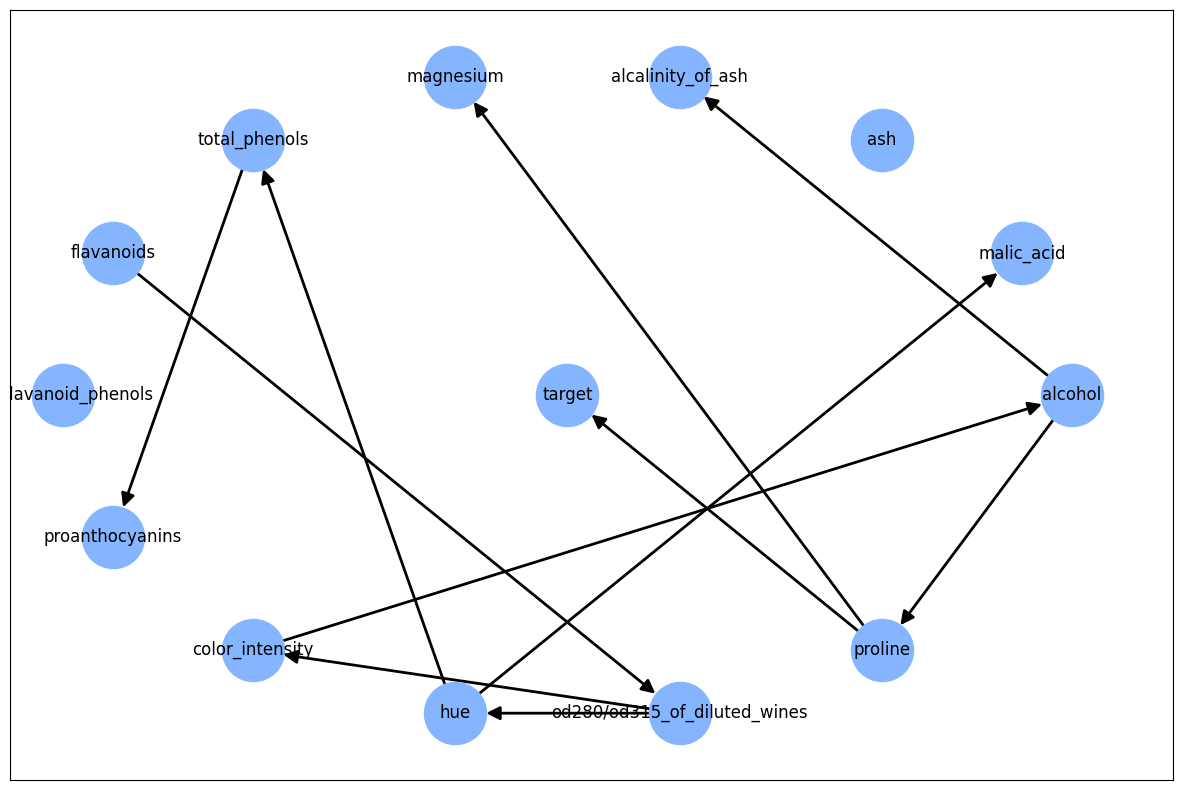

In [27]:
# 想定される因果
G = nx.DiGraph()  # 有向グラフ (Directed Graph)

# ノード追加
G.add_nodes_from(dataset.columns)
# 辺の追加 (頂点も必要に応じて追加される)      
G.add_edges_from(
                estimated_model.edges()
                )

plt.figure(figsize=(15,10))
pos = nx.circular_layout(G, scale=1, center=None, dim=2)  # ここのポジションをこの先のplotでも使用する
pos['target']=np.array([0,0])

# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#draw-networkx
nx.draw_networkx(G, pos,
                node_size=2000,
                node_color='#85B5FF',
                width=2,
                arrowsize=20,
                )
plt.grid(False)
plt.show()


### パラメータ学習

In [28]:
from pgmpy.estimators import MaximumLikelihoodEstimator

In [29]:
estimated_edges = estimated_model.edges()
estimated_edges

OutEdgeView([('alcohol', 'proline'), ('alcohol', 'alcalinity_of_ash'), ('total_phenols', 'proanthocyanins'), ('flavanoids', 'od280/od315_of_diluted_wines'), ('color_intensity', 'alcohol'), ('hue', 'malic_acid'), ('hue', 'total_phenols'), ('od280/od315_of_diluted_wines', 'hue'), ('od280/od315_of_diluted_wines', 'color_intensity'), ('proline', 'target'), ('proline', 'magnesium')])

In [30]:
from pgmpy.models import BayesianNetwork
model = BayesianNetwork(
    estimated_edges
)

In [31]:
model.fit(data_train_discre, MaximumLikelihoodEstimator)

In [32]:
print(model.get_cpds('hue'))
print('\n')
print(model.get_cpds('target'))

+------------------------------+-----+---------------------------------+
| od280/od315_of_diluted_wines | ... | od280/od315_of_diluted_wines(2) |
+------------------------------+-----+---------------------------------+
| hue(0)                       | ... | 0.2                             |
+------------------------------+-----+---------------------------------+
| hue(1)                       | ... | 0.7111111111111111              |
+------------------------------+-----+---------------------------------+
| hue(2)                       | ... | 0.08888888888888889             |
+------------------------------+-----+---------------------------------+


+-----------+----------------------+---------------------+------------+
| proline   | proline(0)           | proline(1)          | proline(2) |
+-----------+----------------------+---------------------+------------+
| target(0) | 0.012048192771084338 | 0.7441860465116279  | 1.0        |
+-----------+----------------------+-----------------

### 推論

In [33]:
list(model.nodes)

['alcohol',
 'proline',
 'alcalinity_of_ash',
 'total_phenols',
 'proanthocyanins',
 'flavanoids',
 'od280/od315_of_diluted_wines',
 'color_intensity',
 'hue',
 'malic_acid',
 'target',
 'magnesium']

In [34]:
# model.predictは内部で pgmpy.inference.VariableElimination を使用している
y_pred = model.predict(data=data_test_discre[list(model.nodes)].drop('target', axis=1))
y_pred

  0%|          | 0/35 [00:00<?, ?it/s]

,target
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,1
8,0
9,1


In [35]:
from sklearn.metrics import accuracy_score
# accuracyを評価
print('accuracy:', accuracy_score(data_test_discre['target'], y_pred))

accuracy: 0.7222222222222222


In [36]:
# 推論結果を確率値で出力
model.predict_probability(data=data_test_discre[list(model.nodes)].drop('target', axis=1))

,target_0,target_1,target_2
0,0.012048,0.578313,0.409639
1,0.012048,0.578313,0.409639
2,0.012048,0.578313,0.409639
3,0.012048,0.578313,0.409639
4,0.744186,0.139535,0.116279
5,0.012048,0.578313,0.409639
6,0.012048,0.578313,0.409639
7,0.012048,0.578313,0.409639
8,1.000000,0.000000,0.000000
9,0.012048,0.578313,0.409639


In [37]:
# targetが既知の状態で、他の変数が最も取りやすい値を確認
model.predict(data=data_test_discre[['target']])

  0%|          | 0/3 [00:00<?, ?it/s]

,flavanoids,proline,alcalinity_of_ash,alcohol,od280/od315_of_diluted_wines,malic_acid,hue,total_phenols,color_intensity,proanthocyanins,magnesium
0,1,0,1,0,1,0,1,1,0,1,0
1,1,0,1,0,1,0,1,1,0,1,0
2,1,0,1,0,1,0,1,1,0,1,0
3,1,0,1,0,1,0,1,1,0,1,0
4,1,0,1,0,1,0,1,1,0,1,0
5,1,0,1,0,1,0,1,1,0,1,0
6,1,0,1,0,1,0,1,1,0,1,0
7,0,2,0,2,0,1,0,0,1,0,1
8,0,2,0,2,0,1,0,0,1,0,1
9,1,0,1,0,1,0,1,1,0,1,0


### 他の推論方法

In [38]:
from pgmpy.inference import CausalInference

infer_adjusted = CausalInference(model)
# print(infer_adjusted.query(variables=["hue"], do={"malic_acid": 2}))
print(infer_adjusted.query(variables=["hue"]))

+--------+------------+
| hue    |   phi(hue) |
+========+============+
| hue(0) |     0.3451 |
+--------+------------+
| hue(1) |     0.5915 |
+--------+------------+
| hue(2) |     0.0634 |
+--------+------------+


### パラメータ推定 Bayesian Estimator

In [139]:
from pgmpy.estimators import BayesianEstimator

model = BayesianNetwork(
    estimated_edges
)

model.fit(data_train_discre, BayesianEstimator, equivalent_sample_size=5)

In [140]:
print(model.get_cpds('hue'))
print('\n')
print(model.get_cpds('target'))

+--------+-----------+
| hue(0) | 0.344671  |
+--------+-----------+
| hue(1) | 0.582766  |
+--------+-----------+
| hue(2) | 0.0725624 |
+--------+-----------+


+-----------+--------------------+-----+--------------------+
| hue       | hue(0)             | ... | hue(2)             |
+-----------+--------------------+-----+--------------------+
| proline   | proline(0)         | ... | proline(2)         |
+-----------+--------------------+-----+--------------------+
| target(0) | 0.0045662100456621 | ... | 0.3333333333333333 |
+-----------+--------------------+-----+--------------------+
| target(1) | 0.2511415525114155 | ... | 0.3333333333333333 |
+-----------+--------------------+-----+--------------------+
| target(2) | 0.7442922374429224 | ... | 0.3333333333333333 |
+-----------+--------------------+-----+--------------------+


### EMアルゴリズム、潜在変数を仮定しながら

In [159]:
model = BayesianNetwork(estimated_edges, latents={'Latent'})
model.add_edge('od280/od315_of_diluted_wines', 'Latent')
model.add_edge('total_phenols', 'Latent')
model.add_edge('Latent', 'target')

list(model.edges())

[('magnesium', 'proline'),
 ('proline', 'target'),
 ('flavanoids', 'od280/od315_of_diluted_wines'),
 ('flavanoids', 'total_phenols'),
 ('od280/od315_of_diluted_wines', 'Latent'),
 ('total_phenols', 'Latent'),
 ('hue', 'malic_acid'),
 ('hue', 'target'),
 ('Latent', 'target')]

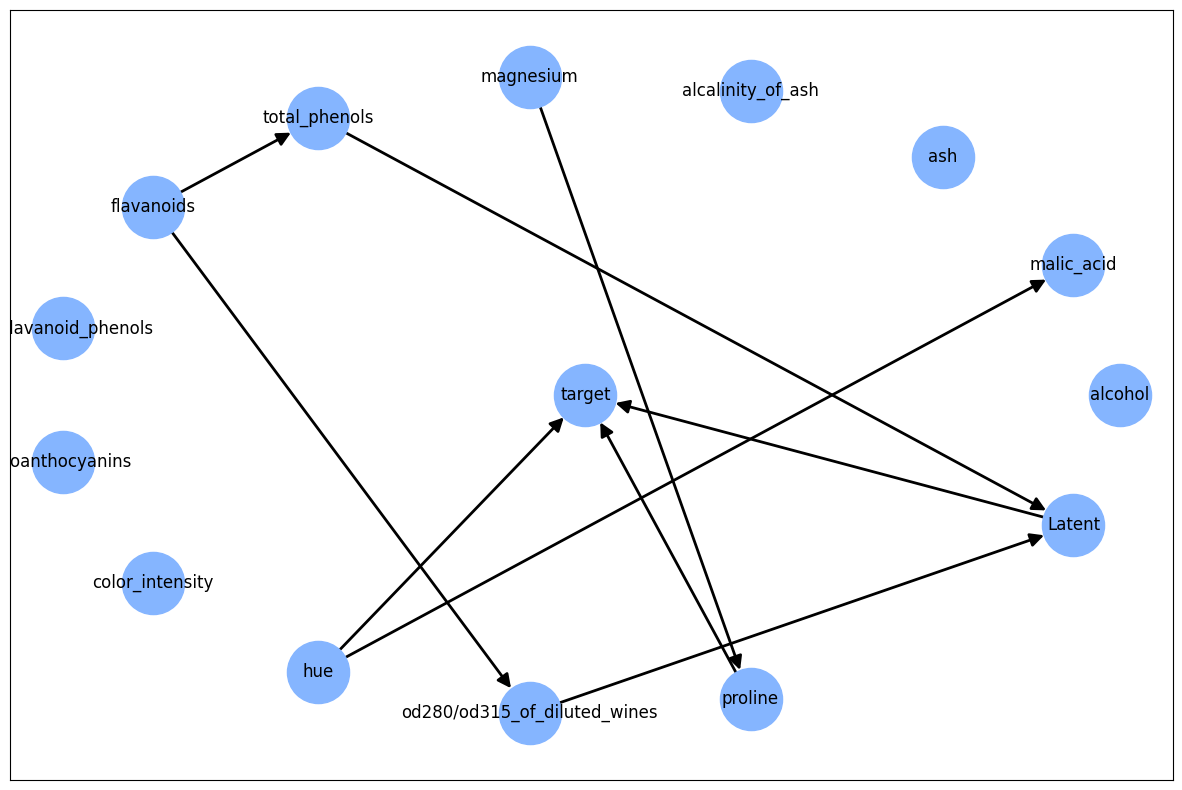

In [160]:
# 想定される因果
G = nx.DiGraph()  # 有向グラフ (Directed Graph)

# ノード追加
G.add_nodes_from(dataset.columns)
# 辺の追加 (頂点も必要に応じて追加される)      
G.add_edges_from(
                model.edges()
                )

plt.figure(figsize=(15,10))
pos = nx.circular_layout(G, scale=1, center=None, dim=2)  # ここのポジションをこの先のplotでも使用する
pos['target']=np.array([0,0])

# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#draw-networkx
nx.draw_networkx(G, pos,
                node_size=2000,
                node_color='#85B5FF',
                width=2,
                arrowsize=20,
                )
plt.grid(False)
plt.show()

In [161]:
from pgmpy.estimators import ExpectationMaximization as EM

model.fit(data_train_discre, EM, latent_card={'Latent':3})

  0%|          | 0/100 [00:00<?, ?it/s]

In [163]:
print(model.get_cpds('hue'))
print('\n')
print(model.get_cpds('target'))
print('\n')


+--------+-----------+
| hue(0) | 0.34507   |
+--------+-----------+
| hue(1) | 0.591549  |
+--------+-----------+
| hue(2) | 0.0633803 |
+--------+-----------+


+-----------+---------------------+-----+------------+--------------------+
| Latent    | Latent(0)           | ... | Latent(2)  | Latent(2)          |
+-----------+---------------------+-----+------------+--------------------+
| hue       | hue(0)              | ... | hue(2)     | hue(2)             |
+-----------+---------------------+-----+------------+--------------------+
| proline   | proline(0)          | ... | proline(1) | proline(2)         |
+-----------+---------------------+-----+------------+--------------------+
| target(0) | 0.0                 | ... | 0.0        | 0.3333333333333333 |
+-----------+---------------------+-----+------------+--------------------+
| target(1) | 0.24999972181726532 | ... | 1.0        | 0.3333333333333333 |
+-----------+---------------------+-----+------------+--------------------+
|

In [164]:
print(model.get_cpds('Latent'))

+------------------------------+-----+---------------------------------+
| od280/od315_of_diluted_wines | ... | od280/od315_of_diluted_wines(2) |
+------------------------------+-----+---------------------------------+
| total_phenols                | ... | total_phenols(2)                |
+------------------------------+-----+---------------------------------+
| Latent(0)                    | ... | 0.33333323384598634             |
+------------------------------+-----+---------------------------------+
| Latent(1)                    | ... | 0.33333334889087984             |
+------------------------------+-----+---------------------------------+
| Latent(2)                    | ... | 0.33333341726313376             |
+------------------------------+-----+---------------------------------+


In [167]:
model.nodes()

NodeView(('magnesium', 'proline', 'flavanoids', 'od280/od315_of_diluted_wines', 'total_phenols', 'hue', 'malic_acid', 'target', 'Latent'))

In [169]:
y_pred = model.predict(data=data_test_discre[['magnesium', 'proline', 'flavanoids', 'od280/od315_of_diluted_wines', 'total_phenols', 'hue', 'malic_acid']])['target']
y_pred

  0%|          | 0/29 [00:00<?, ?it/s]

0     1
1     2
2     1
3     1
4     2
5     1
6     2
7     2
8     0
9     2
10    2
11    1
12    0
13    1
14    2
15    0
16    0
17    2
18    2
19    2
20    0
21    1
22    1
23    2
24    1
25    2
26    0
27    0
28    0
29    1
30    0
31    2
32    1
33    2
34    1
35    1
Name: target, dtype: int64

In [170]:
# accuracyを評価
print('accuracy:', accuracy_score(data_test_discre['target'], y_pred))

accuracy: 0.8611111111111112
